# HW2  Regression Fun Time!

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues.

In [158]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline


In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1) **[10 points]**

Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [160]:
def model(x,w):
    # From Lecture 4 slides, linear regression is given by the equation x^T*w ~= y_predicted:
    y_predicted = w[0] + np.dot(x.T,w[1:])

    return y_predicted

Q2) **[10 ponts]**

Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [161]:
def least_squares(w,x,y):
  # From Lecture 4 slides:
    cost = (np.sum((model(x,w) - y)**2)) / float(y.size)  # P is represented as y.size as y goes from 1 to P

    return cost

Q3) **[5 point]**

This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [162]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w,x,y):

    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    wk = w #Setting our first value of w to the initial input value, w

    #Initialize storage arrays:
    cost_history = [g(wk,x,y)]  #This array will store the cost value from each iteration; initialize with cost of w
    weight_history = [wk]  #values of w are parameters, also called weights, so weight_history will store each iteration of wk

    for k in range(max_its):
        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = gradient(wk,x,y)
        wk = wk - alpha*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = g(wk,x,y)  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)
        weight_history.append(wk)


    return weight_history,cost_history

Q4) **[1 points]**  
Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [163]:
# import the dataset
## Carefully check the path
csvname = '/content/drive/My Drive/Colab Notebooks/kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])


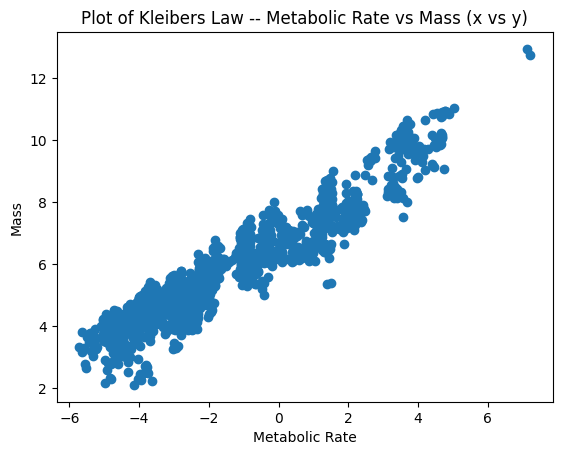

In [164]:
# Plot results:
plt.scatter(x,y)

plt.title("Plot of Kleibers Law -- Metabolic Rate vs Mass (x vs y)")
plt.xlabel("Metabolic Rate")
plt.ylabel("Mass")

plt.show()

Q5) **[10 points]**

[Part 1] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

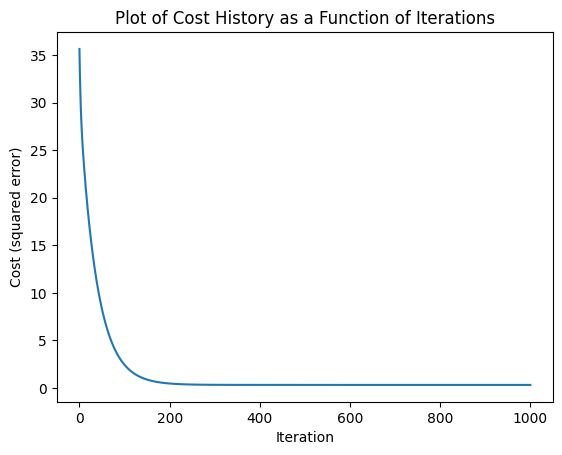

In [165]:
# Initialize variables
w = np.random.uniform(-0.1,0.1,2)
max_its = 1000
alpha = 0.01

# Define cost function as least_squares
g = least_squares

weights,costs = gradient_descent(g,alpha,max_its,w,x,y)

# Plot results:
plt.plot(costs)

plt.title("Plot of Cost History as a Function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (squared error)")

plt.show()

Q5) [Part 2]

Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4.


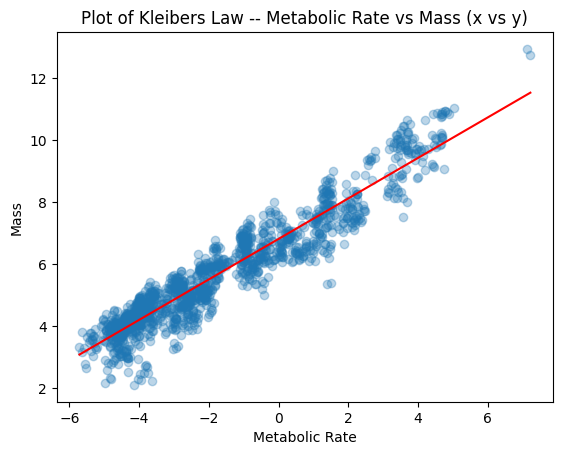

In [166]:
s = np.linspace(np.min(x),np.max(x))  # Generated list of xs to use for prediction

# Since we see the cost is for sure minimized at the last iterations, we can use the last value of weight_history for our predictions:
w_pred = weights[-1]

# From Lecture 5, learned linear model: y = w0* + xw1*
y_pred = w_pred[0] + s*w_pred[1]

# Plot results:
plt.scatter(x,y,alpha=0.3)
plt.plot(s,y_pred,color='red')

plt.title("Plot of Kleibers Law -- Metabolic Rate vs Mass (x vs y)")
plt.xlabel("Metabolic Rate")
plt.ylabel("Mass")

plt.show()


Q6) **[1 points]**  

Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

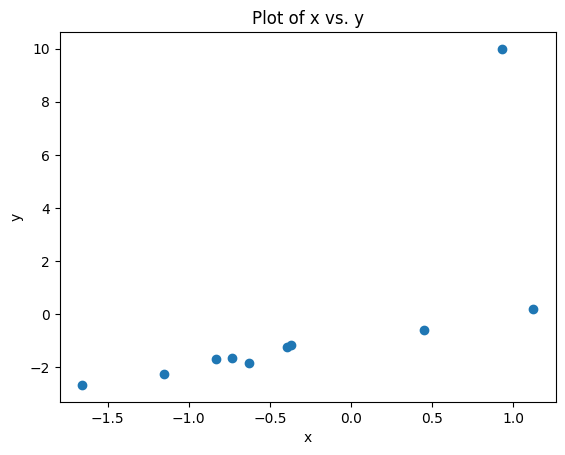

In [167]:
# load in dataset
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# Plot results:
plt.scatter(x,y)

plt.title("Plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

Q7) **[10 ponts]**

 Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [168]:
def least_absolute_deviations(w,x,y):
    # From Lecture 5 slides:
    cost = (np.sum(np.abs(model(x,w) - y))) / float(y.size)

    return cost

 Q8) **[10 points]**

[Part 1] Use the gradient descent function twice to learn two linear models using the new x and y from Q6 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1)
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2)
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


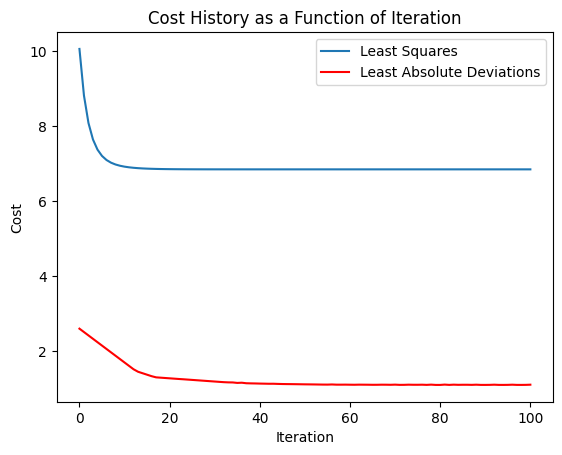

In [169]:
# Initialize constants:
w = np.array([1.0,1.0])
max_its = 100
alpha = 0.1

# Run 1:
g_1 = least_squares
weights_1,costs_1 = gradient_descent(g_1,alpha,max_its,w,x,y)

# Run 2:
g_2 = least_absolute_deviations
weights_2,costs_2 = gradient_descent(g_2,alpha,max_its,w,x,y)

# Plot results:
plt.plot(costs_1, label='Least Squares')
plt.plot(costs_2, color='red', label='Least Absolute Deviations')

plt.title("Cost History as a Function of Iteration")
plt.legend(loc='upper right')
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

Q8) **[Part 2]**

 Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q6. Which of these lines look like a better fit to you?


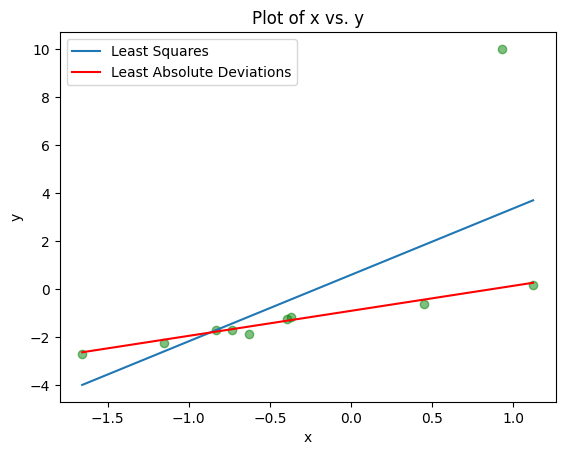

In [170]:
s = np.linspace(np.min(x),np.max(x))  # Generated list of xs to use for prediction

# Since we see the cost is for sure minimized at the last iterations, we can use the last value of weight_history for our predictions:
w_pred_1 = weights_1[-1]
w_pred_2 = weights_2[-1]

# From Lecture 5, learned linear model: y = w0* + xw1*
y_pred_1 = w_pred_1[0] + s*w_pred_1[1]
y_pred_2 = w_pred_2[0] + s*w_pred_2[1]

# Plot scatter from Q6:
plt.scatter(x,y, color='green', alpha=0.5)

# Plot learned lines
plt.plot(s,y_pred_1,label='Least Squares')
plt.plot(s,y_pred_2,color='red',label='Least Absolute Deviations')

# Format plot:
plt.title("Plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')

plt.show()


<font color='red'>Based on the graph shown above, **Least Absolute Deviations looks like a better fit** as it passes more closely through the data points. However, it is important to note the outlier, which the Least Absolute Deviations line seems to disregard.</font>

Q9) **[10 points]**

[Part 1] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [171]:
def MSE(y_actual,y_pred):
    # Based on Lecture 5 notes: (keep in mind model(x,w) = y_pred)
    error = np.sum((y_pred - y_actual)**2) / y_actual.size

    return error

def MAD(y_actual,y_pred):
    # Based on Lecture 5 notes: (keep in mind model(x,w) = y_pred)
    error = np.sum(np.abs(y_pred - y_actual)) / y_actual.size

    return error

Q9) [Part 2]
Use the functions above to report the MSE and MAD for the two models learned in Q8 [Part 1], using the x and y from Q6. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [172]:
# Now to ensure array shapes are matched, we use x instead of s for our linear models
y_pred_1_short = w_pred_1[0] + x*w_pred_1[1]
y_pred_2_short = w_pred_2[0] + x*w_pred_2[1]

# For Least Squares model:
ls_mse = MSE(y,y_pred_1_short)
print("MSE for least squares model:", ls_mse)
ls_mad = MAD(y,y_pred_1_short)
print("MAD for least squares model:", ls_mad)

# For Least Absolute Deviations model:
lad_mse = MSE(y, y_pred_2_short)
print("\nMSE for least absolute deviations model:", lad_mse)
lad_mad = MAD(y,y_pred_2_short)
print("MAD for least absolute deviations model:", lad_mad)

MSE for least squares model: 6.841394300667753
MAD for least squares model: 1.68937055338514

MSE for least absolute deviations model: 9.866874898545982
MAD for least absolute deviations model: 1.09670195220381


<font color='red'>The MSE for Least Squares is smaller than that of Least Absolute Devaitions, but MAD for Least Squares is larger than that of Least Absolute Deviations. Similarly, MSE and MAD are used to address two similar, but still somewhat differing concepts--MSE penalizes larger errors due to its squared term, therefore minimizing MSE reduces large errors; while MAD treats all errors the same, even outliers, meaning minimizing MAD reduces average error across all points. Thus, it is hard to make a judgement off the bat.

<br><font color='red'>However, because the MSE for Least Absolute Deviations is signficantly greater than the MSE for Least Squares, I would say least squares is performing better if I had to choose one (because lower MSE means it is handling large errors better). Even though, visually, Least Squares does not fit as well as Least Absolute Deviations.</font>

Q10) **[6 points]**

 Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [173]:
def L2_regularizer(w):
    # From Lecture 6 slides: (L2 regulizer is sum from 0 to n of theta^2, theta and w are interchangable)
    L2 = np.sum(w**2)

    return L2

def L1_regularizer(w):
    # From Lecture 6 slides: (L1 regulizer is sum from 0 to n of |theta|, theta and w are interchangable)
    L1 = np.sum(np.abs(w))

    return L1

Q11) **[12 points]**

Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q10. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [174]:
def ridge(w,x,y,lmbda):
    # Following Lecture 6 slides:
    cost = least_squares(w,x,y) + lmbda*L2_regularizer(w)

    return cost

def lasso(w,x,y,lmbda):
    # Following Lecture 6 slides:
    cost = least_squares(w,x,y) + lmbda*L1_regularizer(w)

    return cost

## For the remaining questions we will work with `weatherHistory.csv` dataset

The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [175]:
import pandas as pd

# Reading the data: (using pd since NumPy doesn't support multi-data types well)
weather_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherHistory.csv')
weather_data.head()

,Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


 Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [176]:
# Defining x and y:
y = weather_data['Temperature']
x = weather_data[['Apparent_Temperature', 'Humidity', 'Wind_Speed', 'Wind_Bearing', 'Visibility', 'Pressure']]  # Features

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression()

linearModel.fit(x_train, y_train)

Use the train_test_split to divide your modified data into 80% train, 20% test.

In [178]:
# Split into trains and tests:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=28434)

Q12) **[8 points]**

Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [179]:
from sklearn.metrics import mean_squared_error
# Train the model:
m_linear = LinearRegression()
m_linear.fit(train_x, train_y)

# Get y predictions
y_pred_linear = m_linear.predict(train_x)

# Use y predictions and actual y to find MSE:
MSE = mean_squared_error(train_y, y_pred_linear)
print('MSE for linear regression model:', MSE)

MSE for linear regression model: 0.9004113093291809


Q13) **[7 points]**

Repeat Q12 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

Print the learned parameters for the Ridge and Lasso models (using .coef_). Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [180]:
# Train the Ridge model:
m_ridge = Ridge()
m_ridge.fit(train_x, train_y)

# Get y predictions
y_pred_ridge = m_ridge.predict(train_x)

# Use y predictions and actual y to find MSE:
MSE_r = mean_squared_error(train_y, y_pred_ridge)
print('MSE for Ridge model:', MSE_r)


# Train the Lasso model:
m_lasso = Lasso()
m_lasso.fit(train_x, train_y)

# Get y predictions
y_pred_lasso = m_lasso.predict(train_x)

# Use y predictions and actual y to find MSE:
MSE_l = mean_squared_error(train_y, y_pred_lasso)
print('\nMSE for Lasso model:', MSE_l)

MSE for Ridge model: 0.9004113258656832

MSE for Lasso model: 0.9813319420236261


In [181]:
# Print the learned parameters for the Ridge and Lasso models:
print('Learned Paramater for Ridge model:', m_ridge.coef_)
print('\nLearned Paramater for Lasso model:', m_lasso.coef_)

Learned Paramater for Ridge model: [ 8.71876113e-01 -1.45066750e+00  7.96394406e-02 -3.83765112e-04
  8.74521036e-03 -1.84373510e-04]

Learned Paramater for Lasso model: [ 8.80023281e-01 -0.00000000e+00  6.91083566e-02 -2.39892340e-04
  0.00000000e+00 -1.32051526e-04]


<font color='red'>Humidity and Visibility have been zeroed out by Lasso, meaning the model does not find this data useful for calculating the temperature. Constrastly, Ridge keeps all parameters intact, simply making the less important parameters (like Wind Bearing and Pressure) smaller, but not zero. This difference is because of Lasso's use of L1 regularization, while Ridge uses L2 regularization.
</font>

<font color='red'>

</font>